<a href="https://colab.research.google.com/github/yasaminesmati/image-bluring-in-python-/blob/main/blur_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# first Implementation

each pixel x in the resulting image has a value equal to the average value of the input image pixels' values from the 3 × 3 square with the center at x. All pixels at the edges are cropped.
As pixel's value is an integer, all fractions should be rounded down.


In [ ]:
def pixel(matrix,i,j):
    total = 0
    for x in range(i-1,i+2):
        for y in range(j-1,j+2):
            total += matrix[x][y]
    return total//9

def boxBlur(image):
    sol = []
    row = len(image)
    col = len(image[0])
    for i in range(1,row-1):
        temp = []
        for j in range(1,col-1):
            temp.append(pixel(image,i,j))
        sol.append(temp)
    
    return sol

In [ ]:
image = [[7, 4, 0, 1], 
        [5, 6, 2, 2], 
        [6, 10, 7, 8], 
        [1, 4, 2, 0]]
image=boxBlur(image)
image

[[5, 4], [4, 4]]

# second Implementation

we want to avoid edge pixels because the do not have enough neighbours so we avoid first and last column and first and last row.for each pixel we create a variable sum which a tuple of 3 zeros because our image is rgb.then for each pixel we get its rgb value and we add it to our sum .after doing this we divide our result by 9 and we assign them to actual pixel but in new image 

In [ ]:
from PIL import Image
import operator
def my_box(file):
  img=Image.open(file).convert('RGB')
  new_image=img.copy()
  width,height=img.size
  for x in range(1,width-1):
    for y in range(1,height-1):
      sum_pixels=(0,0,0)
      for pixel in [(x-1,y+1) , (x,y+1) , (x+1,y+1) , (x-1,y),(x,y),(x+1,y),(x-1,y-1),(x,y-1),(x+1,y-1)]:
        sum_pixels=tuple(map(operator.add,sum_pixels,img.getpixel(pixel)))
      new_image.putpixel((x,y),tuple(map(operator.floordiv,sum_pixels,(9,9,9))))
  return new_image

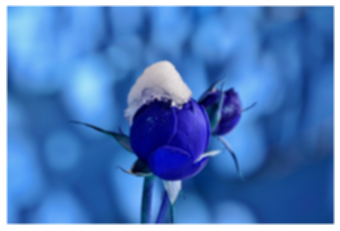

In [ ]:
my_box("/content/download2.png")

#improve second Implementation

add radius to code.

In [ ]:
from PIL import Image
import operator
def my_box(file,r=3):
  img=Image.open(file).convert('RGB')
  new_image=img.copy()
  width,height=img.size
  area=(2*r+1)**2
  for x in range(r,width-r):
    for y in range(r,height-r):
      sum_pixels=(0,0,0)
      for pixel in [(i,j) for j in range(y-r ,y+r+1) for i in range(x-r ,x+r+1)]:
        sum_pixels=tuple(map(operator.add,sum_pixels,img.getpixel(pixel)))
      new_image.putpixel((x,y),tuple(map(operator.floordiv,sum_pixels,(area,area,area))))
  return new_image

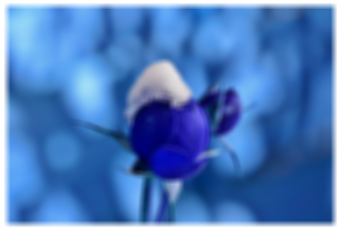

In [ ]:
my_box("/content/download2.png")

#improve second Implementation

In [ ]:
def summed_table(img):
  width,height=img.size
  table=[[(0,0,0)*width for i in range(height)]]
  table[0][0]=img.getpixels((0,0))
  for x in range(1,width):
    table[0][x]=tuple(map(operator.add,img.getpixel((x,0)),table[0][x-1]))
  for y in range(1,height):
    table[y][0]=tuple(map(operator.add,img.getpixel((0,y)),table[y-1][0]))
  for x in range(1,height-1):
    for y in range (1,height-1):
      table[y][x] = tuple (map(operator.sub,tuple(map(operator.add,
                                        tuple(map(operator.add
                                        ,img.getpixel((x,y)),table[y-1][x])),
                                        table[y][x-1])),table[y-1][x-1]))
  return table

In [ ]:
def box_blur(file,r=1):
    img=Image.open(file).convert('RGB')
    new_image=img.copy()
    width,height=img.size
    area=(2*r+1)**2
    table=summed_table(img)
    for x in range(r+1,width-r-1):
      for y in range(r+1,height-r-1):
        sum_pixels=tuple(map(operator.add,tuple(map(operator.sub,
                                                    tuple(map(operator.sub
                                                    ,table[y+r][x+r],
                                                    table[y+r][x-r-1]))
                                                    ,table[y-r-1][x+r])),
                             table[y-r-1][x-r-1]))
        new_image.putpixel((x,y),tuple(map(operator.floordiv,sum_pixels,(area,area,area))))
    return new_image

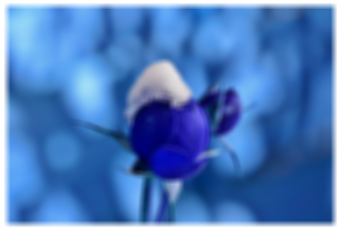

In [ ]:
my_box("/content/download2.png")